# Assignment 03
EE 538 Spring 2020 <br>
Analog Circuits for Sensor Systems <br>
University of Washington Electrical & Computer Engineering <br>

Due: April 25, 2020 <br>
Author: Kevin Egedy

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def read_ltspice_tran(file_name):
    cols = []
    arrs = []
    with open(file_name, 'r',encoding='utf-8') as data:
        for i,line in enumerate(data):
            if i==0:
                cols = line.split()
                arrs = [[] for _ in cols]
                continue
            parts = line.split()
            for j,part in enumerate(parts):
                arrs[j].append(part)
    df = pd.DataFrame(arrs,dtype='float64')
    df = df.T
    df.columns = cols
    return df

<img src="images/HW03Q1.png" width="600">

**Part A**

<b>Structure A: $T=300K, V_A=100, C_L=10\text{pF}, I_C = 1\text{mA}$<b><br>
    
Given <br>
$\begin{eqnarray}
& I_{C0} &=& I_S(e^{V_{\text{BE}}/V_T}-1) \\[1ex]
& I_C &=& I_{C0}(1+\frac{V_{CE}}{V_A}), V_A \gg V_{CE} \rightarrow I_C \approx I_{C0} \\[1ex]
\end{eqnarray}$
<br>

<br>
Find $\frac{v_{\text{out}}}{v_{\text{in}}}$
<br>

$\begin{eqnarray}
& V_{in} &=& V_{\text{BE}} \\[1ex]
& V_T &=& \frac{kT}{q} \Bigg|_{T=300K} &=& 25.86\text{mV} \\[1ex]
& g_m &=& \frac{I_{CO}}{V_T} \\[1ex]
& r_0 &=& \frac{V_A}{I_{C0}} \\[1ex]
& i_C &=& g_m v_{\text{be}} \\[1.5ex]
& v_{\text{out}} &=& -i_c r_0 = -g_m v_{\text{in}} r_0 \\[1.5ex]
& \frac{v_{\text{out}}}{v_{\text{in}}} &=& -g_m r_0 \\[1.5ex] 
& &=& \frac{V_A}{V_T} =-3867
\end{eqnarray}$

<br>
<br>Find transconductance efficiency $\frac{g_m}{I_C}$<br>

    
$\begin{eqnarray}
& g_m    &=& \frac{I_{C0}}{V_T} \\[1ex]
& \frac{g_m}{I_C} &=& \frac{I_{C0}}{I_C V_T} &\approx& \frac{1}{V_T} &=& 38.67 \text{V}^{-1}
\end{eqnarray}$

<br><br>
<b>Structure B $T=300K, C_L=10\text{pF}, I_D = 1\text{mA}, V_{\text{GS}-V_{\text{th}}}=500\text{mV}, \lambda = 0.1\text{V}^{-1}$<b>
<br>
    
Given <br>

$\begin{eqnarray}
& I_D \approx I_{D0} \\[1ex]
\end{eqnarray}$

<br>
Find $\frac{v_{\text{out}}}{v_{\text{in}}}$
<br>

$\begin{eqnarray}
& v_{\text{in}} &=& v_{\text{GS}} \\[1ex]
& g_m &=& \frac{2I_{D0}}{V_{\text{GS}}-V_{\text{th}}} \\[1ex]
& r_0 &=& \frac{1}{\lambda I_{D0}} \\[1ex]
& i_D &=& g_m v_{\text{gs}} \\[1ex]
& v_{\text{out}} &=& -i_D r_0 = -g_m v_{\text{in}} r_0 \\[1ex]
& \frac{v_{\text{out}}}{v_{\text{in}}} &=& -g_m r_0 \\[1ex]
& &=& \frac{-2I_{D0}}{\lambda I_{D0}(V_{\text{GS}}-V_{\text{th}})} \\[1ex]
& &=& \frac{-2}{\lambda(V_{\text{GS}}-V_{\text{th}})} \\[1.5ex]
& &=& -40
\end{eqnarray}$

<br> 
Find transconductance efficiency $\frac{g_m}{I_D}$
<br>

$\begin{eqnarray}
& g_m &=& \frac{2I_{D0}}{V_{\text{GS}}-V_{\text{th}}} \\[1ex]
& \frac{g_m}{I_D} &\approx& \frac{2}{V_{\text{GS}}-V_{\text{th}}}
=4\text{V}^{-1}
\end{eqnarray}$

**Part B**


<img src="images/HW03Q1Structure1.png" width="500">

In [11]:
def parallel(Z1,Z2):
    return 1/((1/Z1)+(1/Z2))

<b>Structure A: $T=300K, V_A=100, C_L=10\text{pF}, I_C = 1\text{mA}$<b>

$\begin{eqnarray}
& V_{in} &=& V_{\text{BE}} \\[1ex]
& i_C &=& g_m v_{\text{be}} \\[1.5ex]
& g_m &=& \frac{I_{CO}}{V_T} = 0.03867\\[1ex]
& r_0 &=& \frac{V_A}{I_{C0}} = 100000\\[1ex]
& v_{\text{out}} &=& -i_c r_{\text{eq}} = -g_m v_{\text{in}} (r_0 \| C_L) \\[0.5ex]
& \frac{v_{\text{out}}}{v_{\text{in}}} &=& -g_m (r_0 \| C_L)\\[1.5ex] 
& &=& -g_m\frac{r_0}{1+sr_0 C} \\[1ex]
& \Bigg| \frac{v_{\text{out}}}{v_{\text{in}}} \Bigg| &=& 
g_m\frac{r_0}{\sqrt{1+(2\pi f r_0 C)^2}} \rightarrow f_T &=& 6.15\cdot 10^8 \text{Hz}
\end{eqnarray}$

fT frequency at 6.16e+08


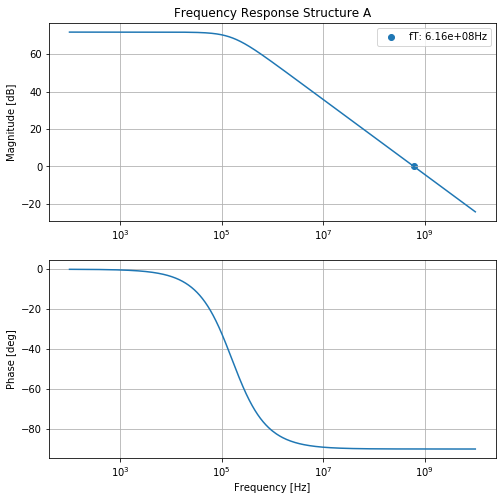

In [76]:
f1 = np.linspace(1e2,1e6,100000)
f2 = np.linspace(1e6,1e10,100000)
f = np.concatenate((f1,f2))
w = 2*np.pi*f
s = 1j*w
gm = 0.03867             # change
r0 = 100000              # change
C = 10e-12
Z_C = 1/(s*C)
H = gm*parallel(r0,Z_C)
#H = gm*r0/(1+s*r0*C)

#Find fT, frequency where magnitude is 1V/V.
mag = abs(H)
x0 = np.where(mag<=1)[0][0]
label = "{:.2e}".format(f[x0])
print(f"fT frequency at {label}")

# Plot the frequency response
fig, axs = plt.subplots(2,figsize=(8,8))
axs[0].set_title('Frequency Response Structure A')
axs[0].semilogx(f, 20*np.log10(abs(H)))
axs[0].scatter(f[x0], 20*np.log10(mag[x0]),label=f"fT: {label}Hz")
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()

axs[1].semilogx(f, np.angle(H,deg=True),label='Ideal')
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].grid()
#axs[1].legend()
plt.show();

<b>Structure B<b> $T=300K, C_L=10\text{pF}, I_D = 1\text{mA}, V_{\text{GS}-V_{\text{th}}}=500\text{mV}, \lambda = 0.1\text{V}^{-1}$

$\begin{eqnarray}
& V_{\text{in}} &=& V_{\text{GS}} \\[1ex]
& i_D &=& g_m v_{\text{gs}} \\[1ex]
& g_m &=& \frac{\partial{I_D}}{\partial{V_{\text{GS}}}} 
= \frac{2I_{D0}}{V_{\text{GS}}-V_{\text{th}}} = 0.004\\[1ex]
& r_0 &=& \frac{1}{\lambda I_{D0}} = 10000\\[1ex]
& v_{\text{out}} &=& -i_D r_{\text{eq}} = -g_m v_{\text{in}} (r_0 \| C_L) \\[1ex]
& \frac{v_{\text{out}}}{v_{\text{in}}} &=& -g_m (r_0 \| C_L) \\[1ex]
& &=& -g_m\frac{r_0}{1+sr_0 C} \\[1ex]
& \Bigg| \frac{v_{\text{out}}}{v_{\text{in}}} \Bigg| &=& 
g_m\frac{r_0}{\sqrt{1+(2\pi f r_0 C)^2}} \rightarrow f_T &=& 6.36\cdot 10^7 \text{Hz}
\end{eqnarray}$

fT frequency at 6.37e+07


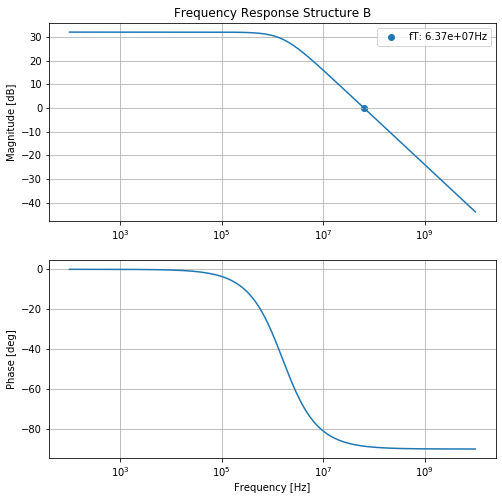

In [75]:
f1 = np.linspace(1e2,1e6,100000)
f2 = np.linspace(1e6,1e10,100000)
f = np.concatenate((f1,f2))
w = 2*np.pi*f
s = 1j*w
gm = 0.004                # change
r0 = 10000                # change
C = 10e-12
Z_C = 1/(s*C)
H = gm*parallel(r0,Z_C)
#H = gm*r0/(1+s*r0*C)

#Find fT, frequency where magnitude is 1V/V.
mag = abs(H)
x0 = np.where(mag<=1)[0][0]
label = "{:.2e}".format(f[x0])
print(f"fT frequency at {label}")

# Plot the frequency response
fig, axs = plt.subplots(2,figsize=(8,8))
axs[0].set_title('Frequency Response Structure B')
axs[0].semilogx(f, 20*np.log10(abs(H)))
axs[0].scatter(f[x0], 20*np.log10(mag[x0]),label=f"fT: {label}Hz")
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()

axs[1].semilogx(f, np.angle(H,deg=True))
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].grid()
#axs[1].legend()
plt.show();

**Part C**

<b>Given $I_D = 1\text{mA}, V_{\text{GS}}-V_{\text{th}} = 500\text{mV}$ <b>
<br>

$\begin{eqnarray}
& \frac{g_m}{I_D} &\approx& \frac{2I_{D0}}{I_{D}(V_{\text{GS}}-V_{\text{th}})} \Bigg|_{I_D = 1\text{mA}, V_{\text{GS}}-V_{\text{th}} = 500\text{mV}} &=& 4\text{V}^{-1} \\[1ex]
\end{eqnarray}$

<br>
<b>Given $I_D = I_se^{V_{\text{GS}}/nV_T} \Bigg|_{n=1.5, V_T = 25.86\text{mV}}$ <b>
<br>

$\begin{eqnarray}
& g_m &=& \frac{\partial{I_D}}{\partial{V_{\text{GS}}}} 
= \frac{\partial}{\partial{V_{\text{GS}}}} I_se^{V_{\text{GS}}/nV_T}
&=& \frac{I_s}{nV_T}e^{V_{\text{GS}}/nV_T} \\[1ex]
& \frac{g_m}{I_D} &=& \frac{\frac{I_s}{nV_T}e^{V_{\text{GS}}/nV_T}}
{I_se^{V_{\text{GS}}/nV_T}} \\[1ex]
& &=& \frac{1}{nV_T} \\[1ex]
& &=& 25.78 \text{V}^{-1}
\end{eqnarray}$

<img src="images/HW03Q2.png" width="600">

**Part A**

<b>Given: $I_S = 10^{-14}\text{A}, \beta = 300, V_A = 100, V_{CC}=5, N=8$<b>
<br>
    
Find: $R_1$ such that $I_{C1} = I_{C2} = 50\mu$A
<br><br>
    
$\begin{eqnarray}
& V_T &=& \frac{kT}{q} \Bigg|_{T=27C=300K} &=& 25.86\text{mV} \\[1ex]
\end{eqnarray}$

<img src="images/HW03Q3.png" width="600">

**Part A**

$\begin{eqnarray}
& V_{\text{out}} &=& V_{DD} - \kappa(V_{\text{in}}-V_{\text{th}})^2 R_D \\[1ex]
& V_{\text{in}} &=& a_{\text{in}}\sin{(2\pi f t)}+V_{DC} \Bigg|_{V_{DC} = V_{\text{th}}+500\text{mV}} \\[1ex]
& V_{\text{out}} &=& V_{DD} - \kappa R_D [a_{\text{in}}\sin{(2\pi f_0 t)}+V_{\text{th}}+500\text{mV}-V_{\text{th}}]^2 \\[1.5ex]
& V_{\text{out}} &=& V_{DD} - \kappa R_D [a_{\text{in}}\sin{(2\pi f t)}+0.5]^2  \\[1.5ex]
& &=& V_{DD} - \kappa R_D [{a_{\text{in}}}^2\sin^2{(2\pi f_0 t)}+a_{\text{in}}\sin{(2\pi f_0 t)}+0.25] \Bigg|_{w=2\pi f_0}\\[.5ex]
& &=& V_{DD} - \kappa R_D [{a_{\text{in}}}^2\sin^2{(wt)}+a_{\text{in}}\sin{(wt)}+0.25] \\[1.5ex]
& &=& V_{DD} - \kappa R_D [\frac{{a_{\text{in}}}^2}{2}(1-cos(2wt))+a_{\text{in}}\sin{(wt)}+0.25] \\[1.5ex]
& &=& V_{DD} - \kappa R_D \frac{{a_{\text{in}}}^2}{2}+\kappa R_D \frac{{a_{\text{in}}}^2}{2}\cos(2wt))-\kappa R_D a_{\text{in}}\sin{(wt)}- \kappa R_D 0.25 \\[1.5ex]
& &=& (V_{DD} - \kappa R_D (\frac{{a_{\text{in}}}^2}{2}+0.25))-\kappa R_D a_{\text{in}}\sin{(wt)}+\kappa R_D \frac{{a_{\text{in}}}^2}{2}\cos(2wt)) \\[1.5ex]
& &=& \text{DC + fundamental sinusioid + 2nd harmonic} \\[1.5ex]
& a_1 &=&  -\kappa R_D a_{\text{in}} \\[1.5ex]
& a_2 &=& \kappa R_D \frac{{a_{\text{in}}}^2}{2}
\end{eqnarray}$



**Part B**

$\begin{eqnarray}
& \frac{a_2}{a_1} &=& \frac{\kappa R_D \frac{{a_{\text{in}}}^2}{2}}{-\kappa R_D a_{\text{in}}} &=& \frac{-a_{\text{in}}}{2} \\[1.5ex]
& &=& \frac{-a_{\text{in}}}{2} \Bigg|_{1\text{mV}} &=& -0.5\text{mV} \\[1ex]
& &=& \frac{-a_{\text{in}}}{2} \Bigg|_{10\text{mV}} &=& -5\text{mV}
\end{eqnarray}$